In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
train=pd.read_csv('./train.csv')
test=pd.read_csv('./test.csv')

In [3]:
train_original=train.copy()
test_original=test.copy()

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [10]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


# Univariate Analysis


Target Vairiable [Loan status]

In [11]:
print(train["Loan_Status"].value_counts())
print(train["Loan_Status"].value_counts(normalize=True))

Y    422
N    192
Name: Loan_Status, dtype: int64
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


<AxesSubplot:>

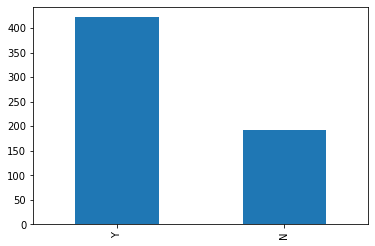

In [12]:
train["Loan_Status"].value_counts().plot.bar()

##  Other categorical Features

In [13]:
categorical_features=[x for x in train.columns if train[x].dtype=="object"]

In [24]:
categorical_features.remove('Loan_ID')

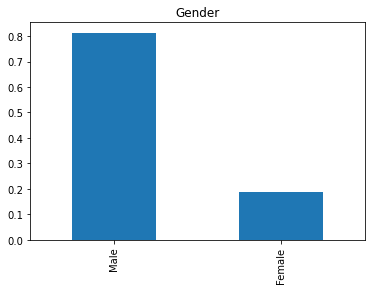

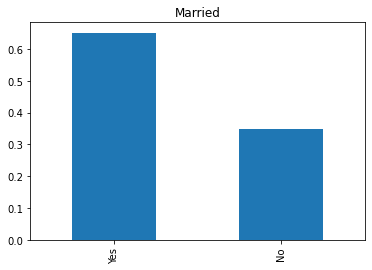

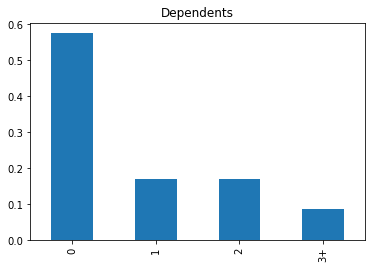

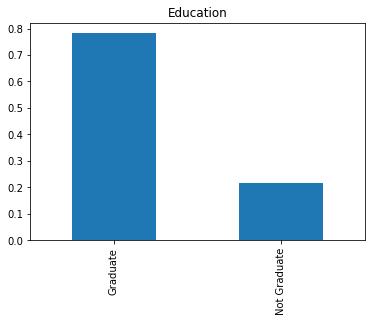

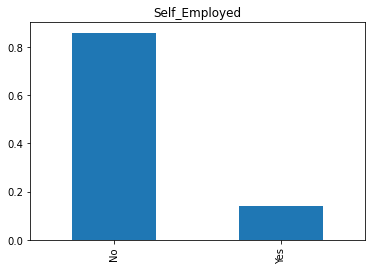

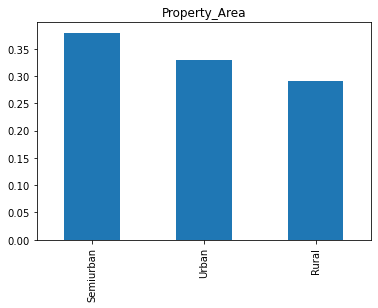

In [25]:
for x in categorical_features:
    train[x].value_counts(normalize=True).plot.bar(title=x)
    plt.show()

## Numerical variables

In [16]:
numerical_features=[[x for x in train.columns if train[x].dtype!="object"]]

In [17]:
numerical_features

[['ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term',
  'Credit_History']]

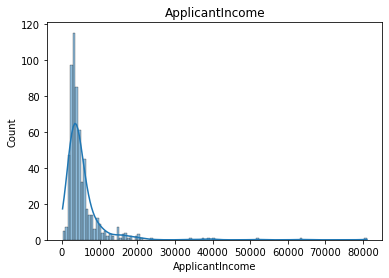

In [18]:
sns.histplot(train["ApplicantIncome"],kde=True)
plt.title("ApplicantIncome")
plt.show()

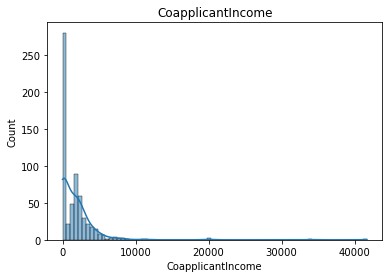

In [19]:
sns.histplot(train["CoapplicantIncome"],kde=True)
plt.title("CoapplicantIncome")
plt.show()

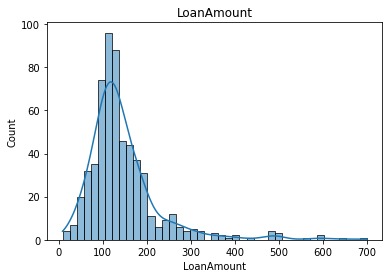

In [20]:
sns.histplot(train["LoanAmount"],kde=True)
plt.title("LoanAmount")
plt.show()

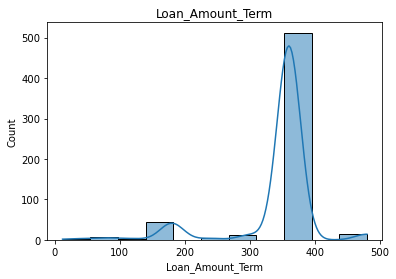

In [21]:
sns.histplot(train["Loan_Amount_Term"],kde=True)
plt.title("Loan_Amount_Term")
plt.show()

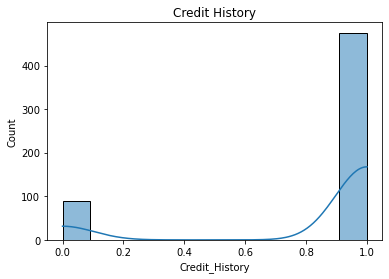

In [22]:
sns.histplot(train["Credit_History"],kde=True)
plt.title("Credit History")
plt.show()

# Bi-Variate Analysis

<AxesSubplot:xlabel='Gender'>

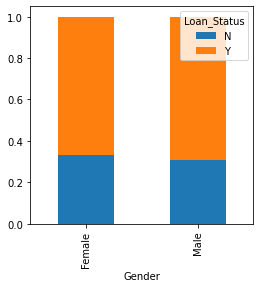

In [27]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Married'>

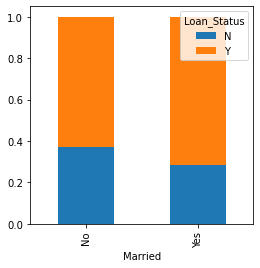

In [28]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Dependents'>

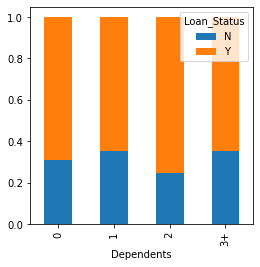

In [29]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Education'>

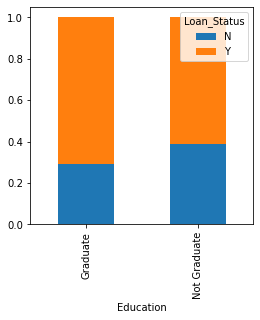

In [30]:
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Self_Employed'>

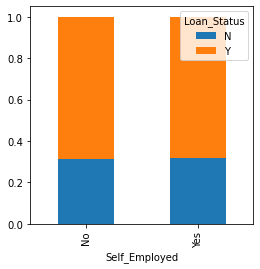

In [32]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

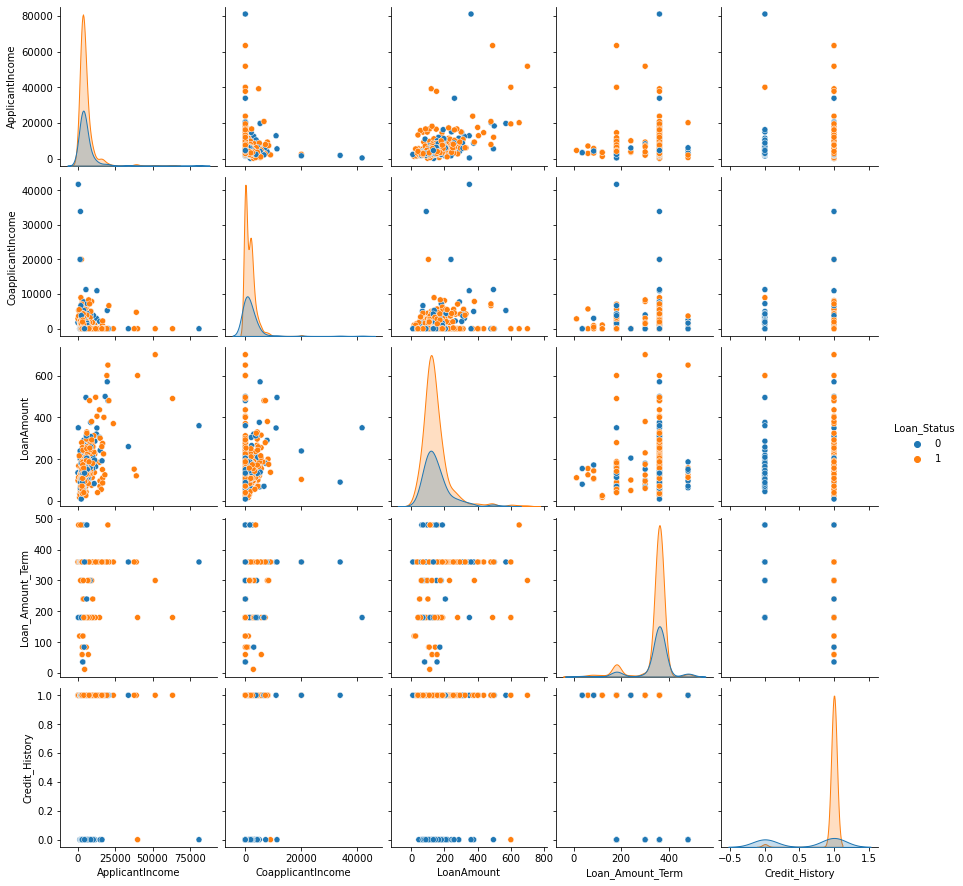

In [44]:
sns.pairplot(train,hue='Loan_Status')

In [41]:
train['Dependents'].replace("3+",3,inplace=True)
test['Dependents'].replace("3+",3,inplace=True)
train['Loan_Status'].replace("Y",1,inplace=True)
train['Loan_Status'].replace("N",0,inplace=True)

In [42]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<AxesSubplot:>

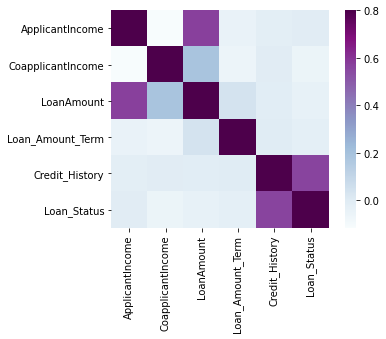

In [43]:
sns.heatmap(train.corr(),vmax=0.8,square=True,cmap="BuPu")

In [38]:
train


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Missing Values and Outlier treatment

In [54]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [55]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## for categorical we will impute with mode
## for numerical we will impute using mean or median


In [56]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)


In [57]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)


In [67]:
train["LoanAmount"].fillna(train['LoanAmount'].median(),inplace=True)

In [68]:
test["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

In [70]:
train["LoanAmount_log"]=np.log(train["LoanAmount"])

In [73]:
test["LoanAmount_log"]=np.log(test["LoanAmount"])

In [74]:
train.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
LoanAmount_log       False
dtype: bool

In [75]:
test.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
LoanAmount_log       False
dtype: bool

# Model Building


In [76]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [77]:
X=train.drop("Loan_Status",1)
y=train['Loan_Status']

## Encoding

In [81]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [84]:
from sklearn.model_selection import train_test_split

In [106]:
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3)

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [108]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
pred_cv=model.predict(x_cv)

In [110]:
accuracy_score(y_cv,pred_cv)

0.8

In [111]:
pred_test=model.predict(test)

In [98]:
submission=pd.read_csv('./submission.csv')

In [99]:
submission['Loan_Status']=pred_test
submission["Loan_ID"]=test_original['Loan_ID']

In [100]:
submission['Loan_Status'].replace(0,"N",inplace=True)
submission['Loan_Status'].replace(1,"Y",inplace=True)

In [101]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_status']).to_csv("Logistics.csv")

In [112]:
train['total_income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['total_income']=test['ApplicantIncome']+test['CoapplicantIncome']


<AxesSubplot:xlabel='total_income', ylabel='Count'>

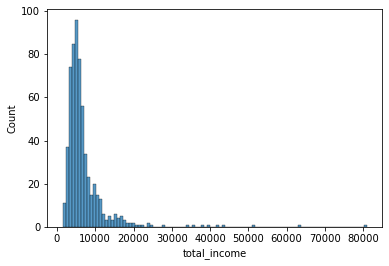

In [115]:
sns.histplot(train['total_income'])

In [116]:
train['total_income_log']=np.log(train['total_income'])
test['total_income_log']=np.log(test['total_income'])

<AxesSubplot:xlabel='total_income_log', ylabel='Count'>

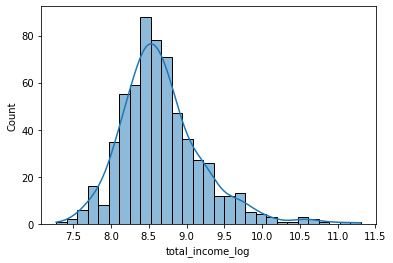

In [118]:
sns.histplot(train['total_income_log'],kde=True)

In [119]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

<AxesSubplot:xlabel='EMI', ylabel='Count'>

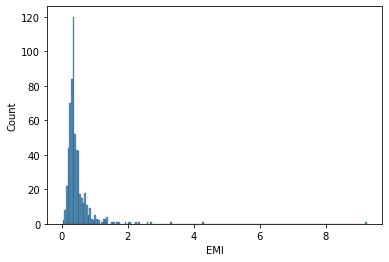

In [120]:
sns.histplot(train['EMI'])

In [121]:
train["EMI_log"]=np.log(train["EMI"])

In [124]:
test['EMI_log']=np.log(test['EMI'])

In [125]:
train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1,inplace=True)
test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1,inplace=True)


In [126]:
X=train.drop('Loan_Status',1)
y=train['Loan_Status']

In [127]:
from sklearn.model_selection import StratifiedKFold

In [130]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("accuracy_score:",score)
    i+=1
    


 1 of kfold 5
accuracy_score: 0.8130081300813008

 2 of kfold 5
accuracy_score: 0.8373983739837398

 3 of kfold 5
accuracy_score: 0.7804878048780488

 4 of kfold 5
accuracy_score: 0.7967479674796748

 5 of kfold 5
accuracy_score: 0.7950819672131147


In [131]:
pred_test=model.predict(test)

In [132]:
submission["Loan_Status"]=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [133]:
submission.replace(0,'N',inplace=True)
submission.replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logkfold.csv')

In [134]:
from sklearn.tree import DecisionTreeClassifier


In [136]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("accuracy_score:",score)
    i+=1
    pred_test=model.predict(test)


 1 of kfold 5
accuracy_score: 0.7560975609756098

 2 of kfold 5
accuracy_score: 0.7073170731707317

 3 of kfold 5
accuracy_score: 0.6991869918699187

 4 of kfold 5
accuracy_score: 0.7235772357723578

 5 of kfold 5
accuracy_score: 0.6639344262295082


In [137]:
submission["Loan_Status"]=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission.replace(0,'N',inplace=True)
submission.replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('DecisionTree.csv')

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("accuracy_score:",score)
    i+=1
    pred_test=model.predict(test)


 1 of kfold 5
accuracy_score: 0.8211382113821138

 2 of kfold 5
accuracy_score: 0.8130081300813008

 3 of kfold 5
accuracy_score: 0.7886178861788617

 4 of kfold 5
accuracy_score: 0.8048780487804879

 5 of kfold 5
accuracy_score: 0.7868852459016393


In [141]:
from sklearn.model_selection import GridSearchCV

In [145]:
param_grid={'max_depth':list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),param_grid)

In [147]:
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [148]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=141, random_state=1)

In [149]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=RandomForestClassifier(random_state=1,max_depth=3,n_estimators=141)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("accuracy_score:",score)
    i+=1
    pred_test=model.predict(test)


 1 of kfold 5
accuracy_score: 0.7967479674796748

 2 of kfold 5
accuracy_score: 0.8292682926829268

 3 of kfold 5
accuracy_score: 0.7967479674796748

 4 of kfold 5
accuracy_score: 0.8048780487804879

 5 of kfold 5
accuracy_score: 0.7950819672131147


In [150]:
submission["Loan_Status"]=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission.replace(0,'N',inplace=True)
submission.replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('RandomForestwithparametersearch.csv')

<AxesSubplot:>

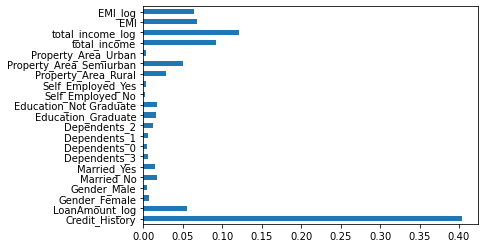

In [152]:
importance=pd.Series(model.feature_importances_,index=X.columns)
importance.plot(kind='barh')

In [153]:
from xgboost import XGBClassifier

In [154]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=XGBClassifier(max_depth=4,n_estimators=50)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print("accuracy_score:",score)
    i+=1
    pred_test=model.predict(test)


 1 of kfold 5


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:55:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


accuracy_score: 0.7723577235772358

 2 of kfold 5
[23:55:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score: 0.7642276422764228

 3 of kfold 5
[23:55:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score: 0.7967479674796748

 4 of kfold 5
[23:55:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to '

In [156]:
submission["Loan_Status"]=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission.replace(0,'N',inplace=True)
submission.replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('xgb.csv')